In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn import metrics

from sklearn.decomposition import PCA
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

# Tarin and Testing
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score

# Save and get model(s)
import pickle

# Data Preparation

### Data Collection / loading:

## Introduction

In this project, we will apply different stastistical methods, to try and analyse patterns and correlation in different lifestyle factors. This will involve trying to train different machine learning models, to see how precisely these patterns can be used to predict how much carbon is emitted based on the correlating factors.
We will try to answer the following questions: 

- Which machine learning methods did you choose to apply in the application?
- How accurate is your solution of prediction?
- Which are the most decisive factors for carbon emissions for an individual?
- Does internet usage directly affect total carbon emissions?
- Does people who see themselves as "energy efficient" generally have lower total carbon emissions?
- Does obesity affect the social acitivty in individuals?
- Are the people travelling frequently by plane, the ones who are emitting the most carbon?
- Which were the challenges in the project development?

In [26]:
# Reading the data from csv into pandas dataframe:
df = pd.read_csv('./data/Carbon-Emission.csv', index_col=None, na_values=['NA'])

In [27]:
# Viewing the size of the dataframe:
df.shape

(10000, 20)

In [28]:
df.sample(5)

,Body Type,Sex,Diet,How Often Shower,Heating Energy Source,Transport,Vehicle Type,Social Activity,Monthly Grocery Bill,Frequency of Traveling by Air,Vehicle Monthly Distance Km,Waste Bag Size,Waste Bag Weekly Count,How Long TV PC Daily Hour,How Many New Clothes Monthly,How Long Internet Daily Hour,Energy efficiency,Recycling,Cooking_With,CarbonEmission
5251,normal,male,vegan,twice a day,electricity,public,NaN,sometimes,109,frequently,902,extra large,3,6,11,14,Sometimes,[],"['Stove', 'Oven', 'Microwave', 'Grill', 'Airfr...",1896
2262,obese,female,vegan,twice a day,natural gas,private,hybrid,never,63,very frequently,8666,large,1,6,7,18,Sometimes,"['Paper', 'Metal']","['Stove', 'Microwave']",3584
5808,overweight,female,vegetarian,less frequently,electricity,walk/bicycle,NaN,never,63,never,38,large,2,10,10,20,Sometimes,['Glass'],"['Stove', 'Microwave']",692
4879,normal,male,omnivore,daily,coal,walk/bicycle,NaN,often,258,rarely,50,small,3,2,0,23,Yes,['Plastic'],[],1617
9008,underweight,female,pescatarian,daily,electricity,walk/bicycle,NaN,sometimes,147,frequently,29,large,3,17,3,15,Sometimes,"['Paper', 'Metal']","['Stove', 'Oven', 'Microwave', 'Grill', 'Airfr...",1168


In [29]:
list(df)

['Body Type',
 'Sex',
 'Diet',
 'How Often Shower',
 'Heating Energy Source',
 'Transport',
 'Vehicle Type',
 'Social Activity',
 'Monthly Grocery Bill',
 'Frequency of Traveling by Air',
 'Vehicle Monthly Distance Km',
 'Waste Bag Size',
 'Waste Bag Weekly Count',
 'How Long TV PC Daily Hour',
 'How Many New Clothes Monthly',
 'How Long Internet Daily Hour',
 'Energy efficiency',
 'Recycling',
 'Cooking_With',
 'CarbonEmission']

In [30]:
#
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 20 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   Body Type                      10000 non-null  object
 1   Sex                            10000 non-null  object
 2   Diet                           10000 non-null  object
 3   How Often Shower               10000 non-null  object
 4   Heating Energy Source          10000 non-null  object
 5   Transport                      10000 non-null  object
 6   Vehicle Type                   3279 non-null   object
 7   Social Activity                10000 non-null  object
 8   Monthly Grocery Bill           10000 non-null  int64 
 9   Frequency of Traveling by Air  10000 non-null  object
 10  Vehicle Monthly Distance Km    10000 non-null  int64 
 11  Waste Bag Size                 10000 non-null  object
 12  Waste Bag Weekly Count         10000 non-null  int64 
 13  Ho

In [31]:
# Replacing nan values with None, this we do beacuse we know/can see that pepole that dont drive has nan values as vehicle type
df = df.replace(np.nan, 'None')

In [32]:
df.isnull().sum()

Body Type                        0
Sex                              0
Diet                             0
How Often Shower                 0
Heating Energy Source            0
Transport                        0
Vehicle Type                     0
Social Activity                  0
Monthly Grocery Bill             0
Frequency of Traveling by Air    0
Vehicle Monthly Distance Km      0
Waste Bag Size                   0
Waste Bag Weekly Count           0
How Long TV PC Daily Hour        0
How Many New Clothes Monthly     0
How Long Internet Daily Hour     0
Energy efficiency                0
Recycling                        0
Cooking_With                     0
CarbonEmission                   0
dtype: int64

In [33]:
# Getting some insights of the value scope:
df.describe()

,Monthly Grocery Bill,Vehicle Monthly Distance Km,Waste Bag Weekly Count,How Long TV PC Daily Hour,How Many New Clothes Monthly,How Long Internet Daily Hour,CarbonEmission
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,173.875200,2031.485900,4.024600,12.139200,25.109000,11.889100,2269.147300
std,72.234018,2769.715597,1.990375,7.106369,14.698725,7.277218,1017.675247
min,50.000000,0.000000,1.000000,0.000000,0.000000,0.000000,306.000000
25%,111.000000,69.000000,2.000000,6.000000,13.000000,6.000000,1538.000000
50%,173.000000,823.000000,4.000000,12.000000,25.000000,12.000000,2080.000000
75%,237.000000,2516.750000,6.000000,18.000000,38.000000,18.000000,2768.000000
max,299.000000,9999.000000,7.000000,24.000000,50.000000,24.000000,8377.000000


In [34]:
# Chek numeric values for distribution
num_cols = df.select_dtypes(include=['int64']).columns
df_nums = df[num_cols]
df_nums.dtypes

Monthly Grocery Bill            int64
Vehicle Monthly Distance Km     int64
Waste Bag Weekly Count          int64
How Long TV PC Daily Hour       int64
How Many New Clothes Monthly    int64
How Long Internet Daily Hour    int64
CarbonEmission                  int64
dtype: object

array([[<Axes: title={'center': 'Monthly Grocery Bill'}>,
        <Axes: title={'center': 'Vehicle Monthly Distance Km'}>,
        <Axes: title={'center': 'Waste Bag Weekly Count'}>],
       [<Axes: title={'center': 'How Long TV PC Daily Hour'}>,
        <Axes: title={'center': 'How Many New Clothes Monthly'}>,
        <Axes: title={'center': 'How Long Internet Daily Hour'}>],
       [<Axes: title={'center': 'CarbonEmission'}>, <Axes: >, <Axes: >]],
      dtype=object)

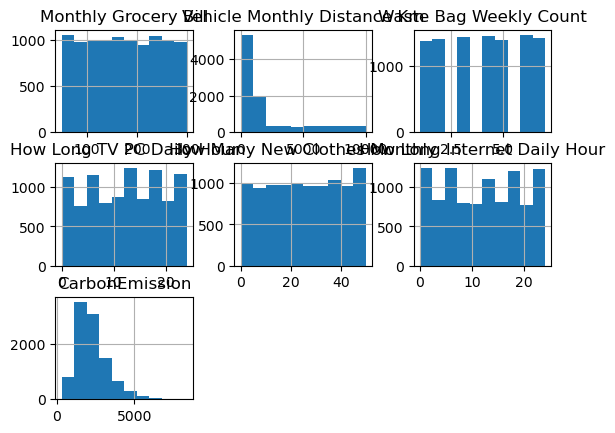

In [36]:
df_nums.hist()

In [35]:
# Encode/transform data numeric
label_encoder = LabelEncoder()

# Making copy of df to a new dataframe called: df_numeric 
df_numeric = df

# Gettning all columns that has object type:
cate_columns = df.select_dtypes(include=['object']).columns

for column in cate_columns:
    df_numeric[column] = label_encoder.fit_transform(df[column])

In [16]:
# Verifying that cols have been encoded:
df_numeric.sample(5)

,Body Type,Sex,Diet,How Often Shower,Heating Energy Source,Transport,Vehicle Type,Social Activity,Monthly Grocery Bill,Frequency of Traveling by Air,Vehicle Monthly Distance Km,Waste Bag Size,Waste Bag Weekly Count,How Long TV PC Daily Hour,How Many New Clothes Monthly,How Long Internet Daily Hour,Energy efficiency,Recycling,Cooking_With,CarbonEmission
7511,1,1,0,0,1,1,0,1,195,2,606,2,2,7,15,24,1,4,3,1574
5138,3,0,0,3,0,2,0,0,162,1,30,2,6,22,27,24,1,2,2,1570
9944,3,0,0,2,3,1,0,0,216,1,447,3,6,11,15,5,2,8,1,810
6885,2,0,2,2,2,2,0,0,152,3,16,2,6,5,9,12,0,6,1,2044
1139,0,0,0,2,0,0,3,1,217,3,2258,2,4,11,22,1,2,8,2,2717


In [17]:
corr_matrix = df_numeric.corr()

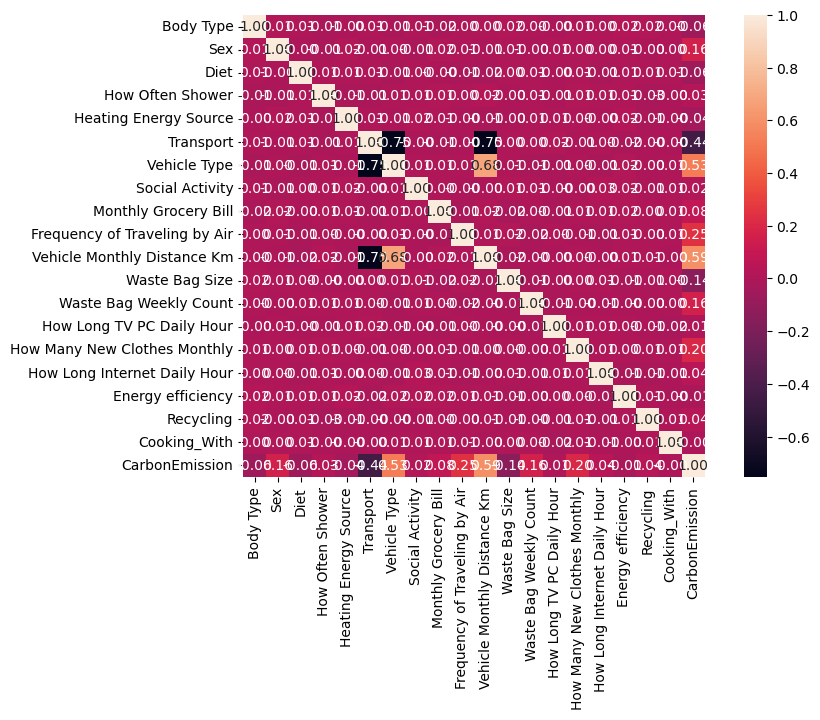

In [18]:
# Heatmap that can show correlation between:
plt.figure(figsize=(10,6))
sns.heatmap(corr_matrix, annot=True, square=True, fmt=".2f")
plt.show()

<Axes: >

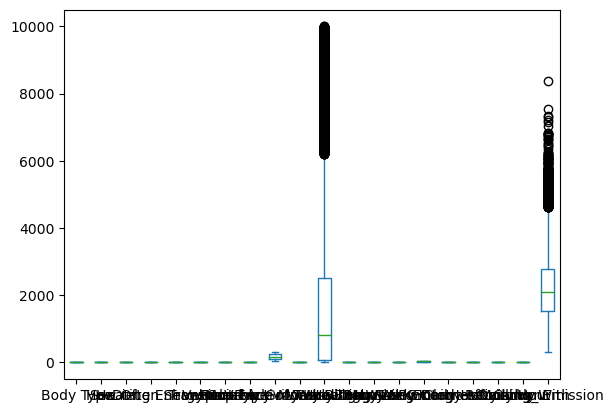

In [19]:
df_numeric.plot.box()

<Axes: >

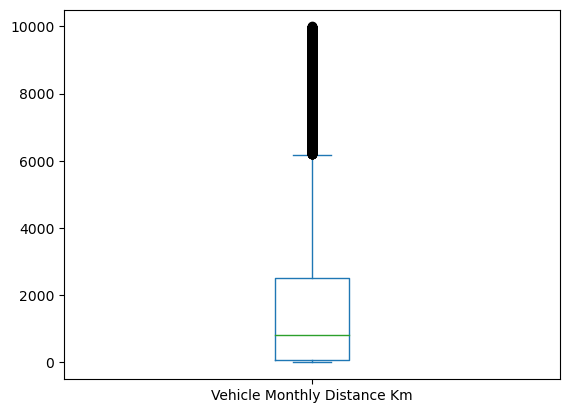

In [39]:
df_nums['Vehicle Monthly Distance Km'].plot.box()

In [42]:
med = df_nums['Vehicle Monthly Distance Km'].median()
df_nums['Vehicle Monthly Distance Km'].max() - med

9176.0

As we can see, the distribution of distance travelled by vehicle is very skewed, with 75% of the data lying beneath 3000 km pr month, with quite a few outlier being outragerously above the median. This might still be an accurate representation though, since some individuals just might have to travel that much